In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
# YOUR CODE HERE!
filepath = Path(r'C:\Users\jeff\OneDrive\Documents\GitHub\credit-risk-classification\Credit_Risk\lending_data.csv')
lending_data_df = pd.read_csv(filepath)
# Review the DataFrame
lending_data_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_data_df.loan_status

# Separate the X variable, the features
X = lending_data_df.drop(columns = 'loan_status', axis = 1)

In [4]:
# Review the y variable Series
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [5]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [6]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [7]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logReg_model = LogisticRegression(random_state = 1)

# Fit the model using training data

logReg_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [8]:
# Make a prediction using the testing data
#_predictions = logistic_classifier.predict(X_test)
#logistic_pred_df = pd.DataFrame({"Prediction": logistic_predictions, "Actual": y_test}).reset_index(drop = True)
#logistic_pred_df.tail(10)
logReg_pred = logReg_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

Confusion Matrix


,Predicted Healthy loan,Predicted High-Risk loan
Actual Healthy loan,18663,102
Actual High-Risk loan,56,563


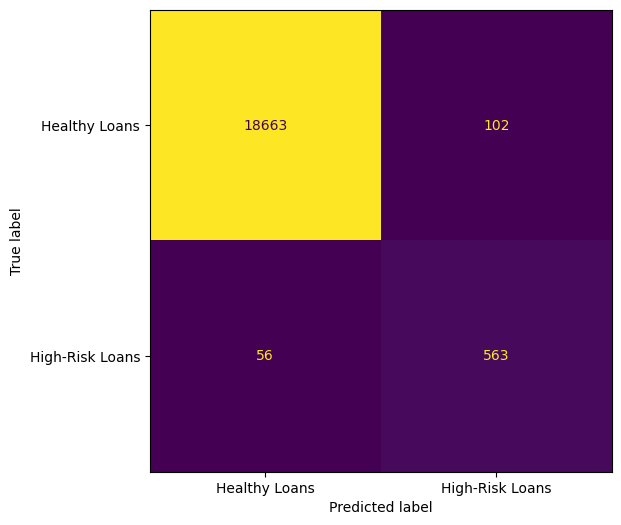

In [9]:
# Generate a confusion matrix for the model
cm = confusion_matrix(y_test, logReg_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual Healthy loan", "Actual High-Risk loan"], columns=["Predicted Healthy loan", "Predicted High-Risk loan"]
)

print("Confusion Matrix")
display(cm_df)



from sklearn.metrics import  ConfusionMatrixDisplay
# create confusion matrix from predictions
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    logReg_pred,  
    ax=ax,
    display_labels=["Healthy Loans", "High-Risk Loans"], 
    colorbar=False
)

plt.savefig("model1", dpi=300)  # save the plot
plt.show()

In [11]:
# Print the classification report for the model
print(classification_report(y_test, logReg_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model performs very well for both classes, with particularly high performance for predicting healthy loans (class 0). However, there is some room for improvement in precision for predicting high-risk loans (class 1).

---